In [ ]:
!pip install dowhy
!apt install libgraphviz-dev
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ノック1
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/s1ok69oo/causal_inference_100knock/main/data/causal_knock1.csv')

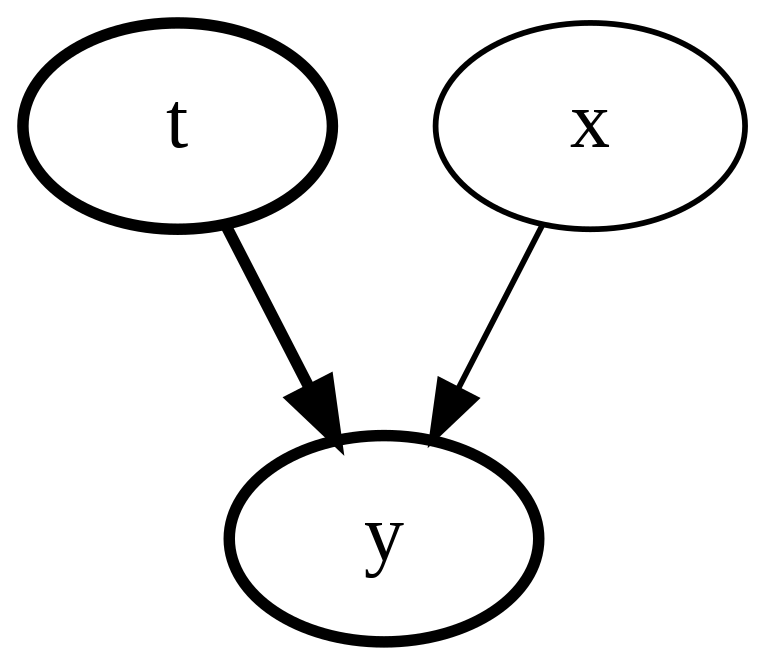

In [ ]:
# ノック2
from dowhy import CausalModel
from IPython.display import Image, display

data = df[['y', 't', 'x']]

# グラフを描画
model = CausalModel(
    data=data, 
    treatment='t', 
    outcome='y', 
    effect_modifiers='x'
    )

model.view_model()
display(Image(filename="causal_model.png"))

In [ ]:
# ノック3
df['y'].mean() - df['x'].mean()

-0.7999999999999989

In [ ]:
# ノック4
df['y_t1'] - df['y_t0']

0     5
1     5
2     5
3     4
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    5
20    5
21    5
22    5
23    5
24    5
25    5
26    5
27    5
28    5
29    5
30    5
31    5
32    5
33    5
34    5
35    5
36    5
37    5
38    4
39    5
40    5
41    5
42    5
43    5
44    5
45    5
46    5
47    5
48    5
49    5
50    5
51    5
52    5
53    5
54    5
55    5
56    5
57    5
58    5
59    5
dtype: int64

In [ ]:
# ノック5
df['y_t1'].mean() - df['y_t0'].mean()

4.966666666666667

In [ ]:
# ノック6
df_t1 = df[df['t']==1]
df_t1['y_t1'].mean() - df_t1['y_t0'].mean()

4.92

In [ ]:
# ノック7
df_over10 = df[df['x']>10]
df_over10['y_t1'].mean() - df_over10['y_t0'].mean()

5.0

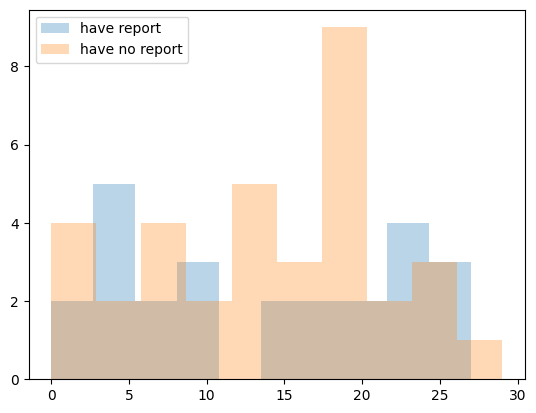

In [ ]:
# ノック8
import matplotlib.pyplot as plt
%matplotlib inline

# 分析レポートありの営業の前季の受注件数
df_t1 = df[df['t']==1]
plt.hist(df_t1['x'], alpha=0.3, label='have report')

# 分析レポートなしの営業の前季の受注件数
df_t0 = df[df['t']==0]
plt.hist(df_t0['x'], alpha=0.3, label='have no report')

# 描画
plt.legend()
plt.show()

In [ ]:
# ノック9
df_t1['y'].mean() - df_t0['y'].mean()

4.434285714285714

In [ ]:
# ノック10
from scipy import stats

t, p = stats.ttest_ind(df_t1['y'], df_t0['y'], alternative='greater')
print(f"p値: {p}")

p値: 0.007380686135298631
